In [3]:
#import sys 
#!{sys.executable} -m pip install textblob
#!{sys.executable} -m pip install pycountry


In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\anupm\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
consumer_key= 'Wy8JogtOI1c0lm1fewYOafulI'
consumer_secret= 'GltKa70556hvmVXaZxFUFZIP76hmOhyZvqYvq1IrmykvK1nCjY'
access_token= '782240173-WxqZCgsQEe0adRE4RVjz5c62BHJwzJnQKZu0UOey'
access_token_secret= 'jwWXUslDgGPuw5i0jZifJt0dEtrOXVNtQhYNMbvPQ0z6X'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit= True)

In [4]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [5]:
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = 200

Please enter keyword or hashtag to search: #vaccine


In [6]:
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score["neg"]
 neu = score["neu"]
 pos = score["pos"]
 comp = score["compound"]
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
    negative_list.append(tweet.text)
    negative += 1
 elif pos > neg:
    positive_list.append(tweet.text)
    positive += 1
 elif pos == neg:
    neutral_list.append(tweet.text)
    neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [7]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  65
negative number:  54
neutral number:  81


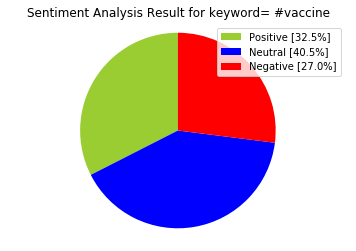

In [8]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [20]:
tweet_list

,0
0,When do we start producing in Ireland? @Michea...
1,"RT @DavidBroderDO: 𝗘𝘅𝗮𝗰𝘁𝗹𝘆 𝗼𝗻𝗲 𝘆𝗲𝗮𝗿 𝗮𝗴𝗼, March..."
2,Justin knew. \n\n#vaccine #biden #covid #itsgo...
3,♥️ this video by @hotvickkrishna - a great exa...
4,"RT @momotchiii: ""Ceci est le #passeport vert.\..."
5,Atrazeneca Vaccine was denied by the European ...
6,RT: @DrTedros does not deserve to lead an inte...
7,Would love to know if @EmbajadaUSAenRD will as...
8,RT @WMulombo: What a day in history! Privilege...
9,RT @litecoin_bull: 🚨ALERT🚨BREAKING! 🚨 Californ...


In [9]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," " ,x)
#rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt) .map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @boomlive_in: A viral image claims that it ...,a viral image claims that it shows a #covid19...
1,India has administered over 2.6 cr #vaccine do...,india has administered over 2.6 cr #vaccine do...
2,"RT @TrasElValle_OBC: ""El internado: Las cumbre...","""el internado: las cumbres"" 🦅 (crítica):\n\n ..."
3,RT @Jerusalem_Post: The @WHO's advisory commit...,the 's advisory committee is looking at the ...
4,🇦🇹Chancellor #Kurz reveals there were secret n...,🇦🇹chancellor #kurz reveals there were secret n...
5,Thailand Delays AstraZeneca Vaccine Roll-Out\n...,thailand delays astrazeneca vaccine roll-out\n...
6,"The #UN chief criticized the ""many examples of...","the #un chief criticized the ""many examples of..."
7,"RT @TrasElValle_OBC: ""El internado: Las cumbre...","""el internado: las cumbres"" 🦅 (crítica):\n\n ..."
8,"RT @jjaranaz94: ""El internado: Las cumbres"" 🦅 ...","""el internado: las cumbres"" 🦅 (crítica):\n\n ..."
9,"RT @momotchiii: ""Ceci est le #passeport vert.\...","""ceci est le #passeport vert.\nscannez le ici..."


In [10]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
 else:
    tw_list.loc[index, 'sentiment'] = "neutral"
 tw_list.loc[index, 'neg'] = neg
 tw_list.loc[index, 'neu'] = neu
 tw_list.loc[index, 'pos'] = pos
 tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @boomlive_in: A viral image claims that it ...,a viral image claims that it shows a #covid19...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,India has administered over 2.6 cr #vaccine do...,india has administered over 2.6 cr #vaccine do...,0.050000,0.500000,neutral,0.000,1.000,0.000,0.0000
2,"RT @TrasElValle_OBC: ""El internado: Las cumbre...","""el internado: las cumbres"" 🦅 (crítica):\n\n ...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @Jerusalem_Post: The @WHO's advisory commit...,the 's advisory committee is looking at the ...,0.000000,0.500000,neutral,0.000,1.000,0.000,0.0000
4,🇦🇹Chancellor #Kurz reveals there were secret n...,🇦🇹chancellor #kurz reveals there were secret n...,-0.092857,0.635714,positive,0.000,0.851,0.149,0.2732
5,Thailand Delays AstraZeneca Vaccine Roll-Out\n...,thailand delays astrazeneca vaccine roll-out\n...,0.000000,0.000000,positive,0.000,0.902,0.098,0.0772
6,"The #UN chief criticized the ""many examples of...","the #un chief criticized the ""many examples of...",0.500000,0.500000,negative,0.116,0.787,0.097,-0.1027
7,"RT @TrasElValle_OBC: ""El internado: Las cumbre...","""el internado: las cumbres"" 🦅 (crítica):\n\n ...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,"RT @jjaranaz94: ""El internado: Las cumbres"" 🦅 ...","""el internado: las cumbres"" 🦅 (crítica):\n\n ...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
9,"RT @momotchiii: ""Ceci est le #passeport vert.\...","""ceci est le #passeport vert.\nscannez le ici...",0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [31]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [57]:
#Function to Create Wordcloud
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
cloud_mask = np.array(Image.open(r"C:\Users\anupm\Desktop\circle.png"))
# Transform your mask into a new one that will work with the function:
transformed_cloud_mask = np.ndarray((cloud_mask.shape[0],cloud_mask.shape[1]), np.int32)

for i in range(len(cloud_mask)):
    transformed_cloud_mask[i] = list(map(transform_format, cloud_mask[i]))

def create_wordcloud(text):
 mask = transformed_cloud_mask
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",mask = mask, max_words=30,stopwords=stopwords,repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

Word Cloud Saved Successfully


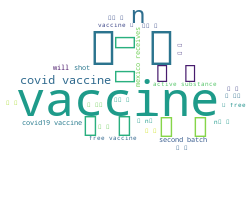

In [58]:
#create_wordcloud(tw_list["text"].values)
create_wordcloud(tw_list_positive["text"].values)
#create_wordcloud(tw_list_negative["text"].values)
#np.array(Image.open(r"C:\Users\anupm\Desktop\circle.png"))